In [ ]:
- Título e nome dos integrantes;  ok
- Introdução: motivação e objetivos da análise; ok
- Dados usados: descrição do(s) dataset(s) e exploração inicial dos dados;ok
- Pré-processamento: limpeza e transformação dos dados necessários, explicando as decisões tomadas;
- Perguntas: mostrar cada pergunta e executar o passo a passo para respondê-las (vocês devem utilizar regressão linear ou agrupamento em pelo menos uma pergunta);
- Conclusão: resumir os resultados encontrados e explicar por que são importantes. Apontar limitações, trabalhos futuros e melhorias que podem ser feitas.

## Prostate Cancer Recurrence Analysis
#### Elayni Enoly S. Franco

### Introduction
In this notebook, I explore and analyze the dataset "Blood Storage" from Cleveland Clinic Lerner Research Institute (http://www.lerner.ccf.org/qhs/datasets/).
The dataset was originally used to analyze how the blood storage can influence in prostate cancer recurrence. In this notebook, the data about blood storage will be delete and another questions will be answered. 
The motivation to use this dataset starts in a searching for health dataset. The choice was based on reading the abstract of the original study. The objective of this analyze is understand if another columns influences in a prostate cancer recurrence.

### Dataset Description

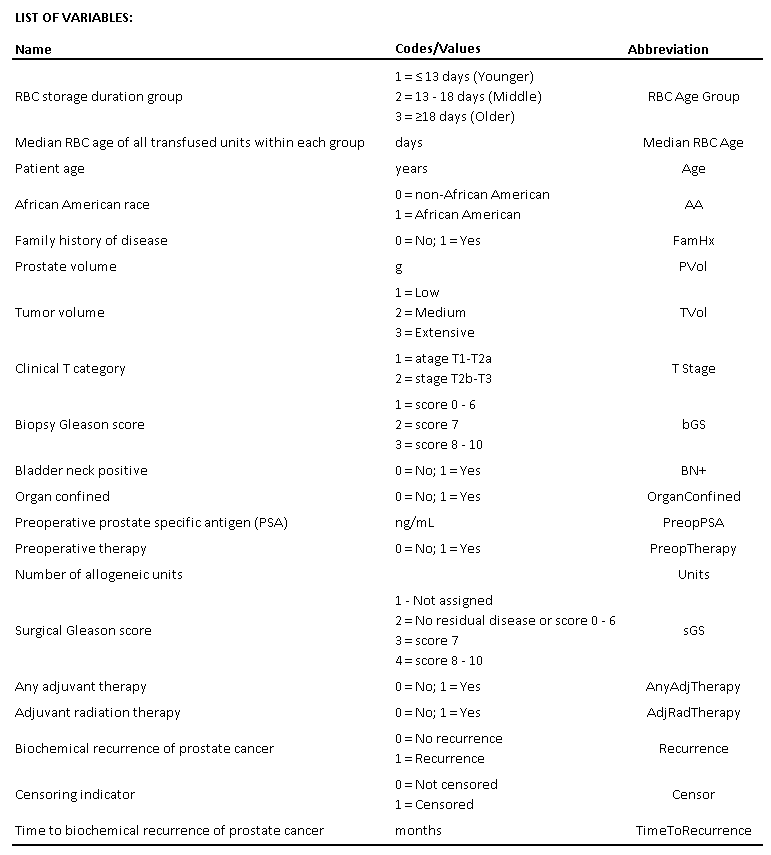


### Initial Exploration



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="pastel")

# import dataset and view first datas
df = pd.read_csv("https://raw.githubusercontent.com/elayni/prostate-cancer-recurrence-analysis/main/Dataset/BloodStorage.csv", error_bad_lines=False)

df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [4]:
df['Recurrence'].value_counts()

0    262
1     54
Name: Recurrence, dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
311    False
312    False
313    False
314    False
315    False
Length: 316, dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RBC Age Group     316 non-null    int64  
 1   Median RBC Age    316 non-null    int64  
 2   Age               316 non-null    float64
 3   AA                316 non-null    int64  
 4   FamHx             316 non-null    int64  
 5   PVol              307 non-null    float64
 6   TVol              310 non-null    float64
 7   T Stage           303 non-null    float64
 8   bGS               314 non-null    float64
 9   BN+               316 non-null    int64  
 10  OrganConfined     316 non-null    int64  
 11  PreopPSA          313 non-null    float64
 12  PreopTherapy      316 non-null    int64  
 13  Units             316 non-null    int64  
 14  sGS               316 non-null    int64  
 15  AnyAdjTherapy     316 non-null    int64  
 16  AdjRadTherapy     316 non-null    int64  
 1

In [7]:
# count missing data
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 9
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             3
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     1
dtype: int64

In [8]:
# drop categorical data
df_nocatg = df.drop(["RBC Age Group", "AA", "FamHx", "TVol", "T Stage",
                    "bGS", "BN+", "Median RBC Age"], axis = 1)
df_nocatg = df_nocatg.drop(["PreopTherapy", "sGS", "AnyAdjTherapy", "OrganConfined", 
                           "AdjRadTherapy", "Recurrence", "Censor"], axis = 1)

There is no "best" number of bins, and different bin sizes can reveal different features of the data. Sturges' formula is derived from a binomial distribution and implicitly assumes an approximately normal distribution, is a criterion used to determine the number of classes or ranges needed to graph a set of statistical data. It was chosen for its ease of application. 

In [9]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(316)

<ipython-input-10-4f4cf55cf852>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_nocatg.hist(ax=fig, bins= int(k), grid=True)


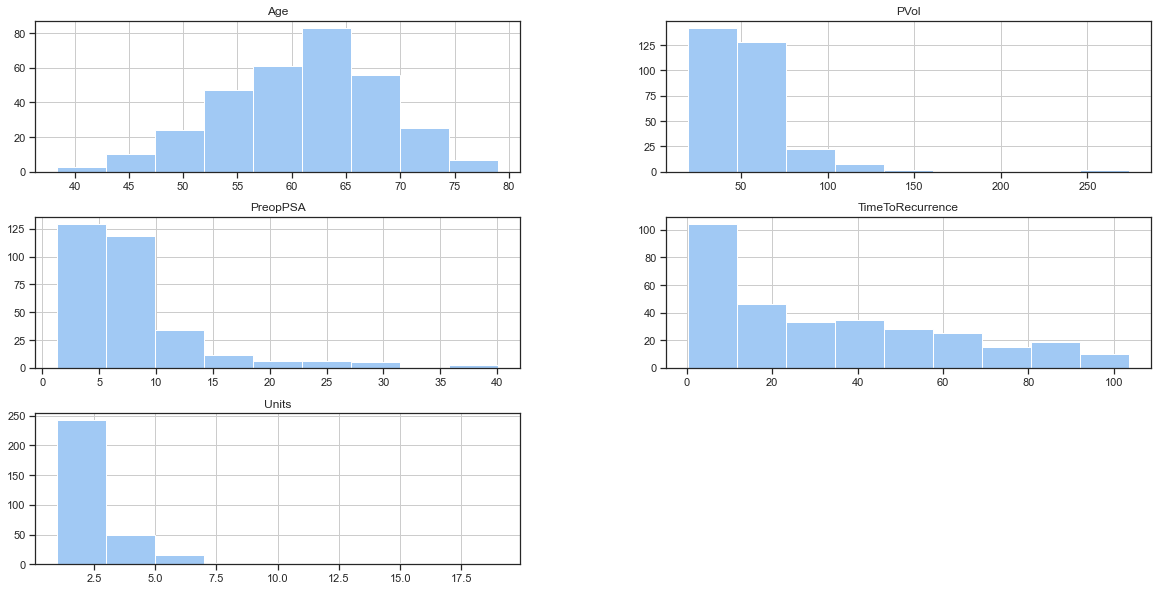

In [10]:
# To see data distribution
fix, fig = plt.subplots(figsize=(20,10))
df_nocatg.hist(ax=fig, bins= int(k), grid=True)
plt.show()

In [11]:
# Percent of race, 17% is African American and 82% can be white, asian or indigenous people,
# but because they are American people, most of them are likely to be white.
race = df['AA'].value_counts()
race/len(df)

0    0.825949
1    0.174051
Name: AA, dtype: float64

### Data Pre-processing

In [12]:
df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [13]:
# replacing missing data to column median
df['PVol'].fillna(df['PVol'].median(), inplace=True)
df['PreopPSA'].fillna(df['PreopPSA'].median(), inplace=True)
df['TimeToRecurrence'].fillna(df['TimeToRecurrence'].median(), inplace=True)
# only categorical missing data 
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 0
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             0
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     0
dtype: int64

In [14]:
# drop columns that will not be useful to answer questions
df = df.drop(["RBC Age Group", "Median RBC Age"], axis = 1)

In [15]:
# checck dataframe
df.head(3)

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10


### Centrality and Dispersion Measures

In [16]:
# Why no use df.mean(), because any columns are normalized to categorical data
# To use numeric data
df_numeric = df[["Age", "PVol", "PreopPSA", "Units", "TimeToRecurrence"]]

# centrality and dispersion measures
# means and medians
df_means = pd.DataFrame(np.mean(df_numeric, axis = 0), columns= ["means"])
df_medians = pd.Series(np.median(df_numeric, axis=0), name = "medians")

df_means.reset_index(drop=True, inplace = True)
df_c = pd.concat([df_means, df_medians], axis=1)

df_c.rename(index = {0: "Age", 1: "Pvol", 2: "PreopPSA",
               3:"Units", 4:"TimeToReccurence"}, inplace= True)

# dataframe with centrality measures - mean and median
df_c

,means,medians
Age,61.157278,61.85
Pvol,56.236076,49.00
PreopPSA,8.166297,6.20
Units,2.455696,2.00
TimeToReccurence,32.893766,25.30


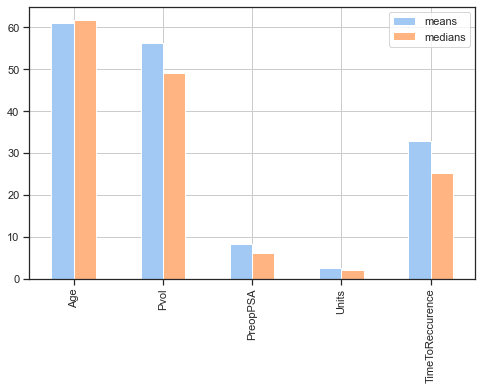

In [17]:
# comparison between means and medians
df_c.plot(kind = 'bar', grid=True, figsize=(8,5))

In [19]:
# mode for categorical data
df_catg = df[["AA", "FamHx", "TVol", "T Stage", "bGS", "BN+", "OrganConfined",
             "PreopTherapy", "sGS", "AnyAdjTherapy", "AdjRadTherapy", "Recurrence", "Censor"]]

df_catg.mode()

,AA,FamHx,TVol,T Stage,bGS,BN+,OrganConfined,PreopTherapy,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor
0,0,0,2.0,1.0,1.0,0,1,0,3,0,0,0,1


In [20]:
# variance
np.var(df_numeric)

Age                  52.255612
PVol                884.622559
PreopPSA             35.645736
Units                 3.596138
TimeToRecurrence    810.625530
dtype: float64

In [21]:
# standard deviation
df_numeric.std()

Age                  7.240269
PVol                29.789778
PreopPSA             5.979874
Units                1.899356
TimeToRecurrence    28.516643
dtype: float64

In [22]:
df.shape

(316, 18)

### Visualization

Text(0.5, 1.0, 'Any Adjuvant Therapy and Time to Recurrence')

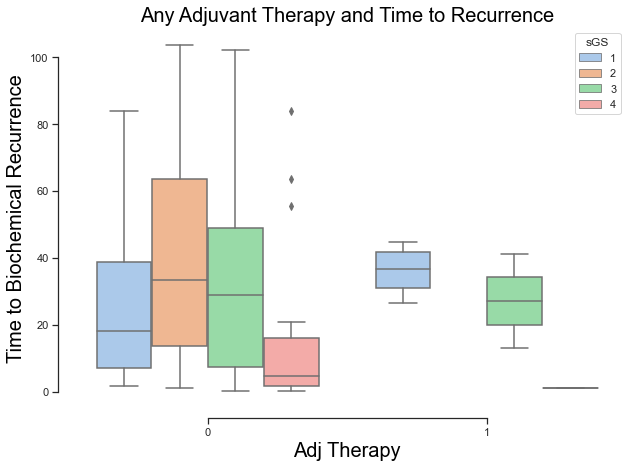

In [23]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(10,7))
sns.boxplot(x="AnyAdjTherapy", y="TimeToRecurrence",
            hue="sGS", data=df)
sns.despine(offset=10, trim=True)
plt.xlabel('Adj Therapy', c ='black', fontsize=20)
plt.ylabel('Time to Biochemical Recurrence',c='g', color = 'black', fontsize=20)
plt.title('Any Adjuvant Therapy and Time to Recurrence', c='black', fontsize=20)

# Any outliers in pacientes with 4 surgical Gleason score without adjuvant therapy

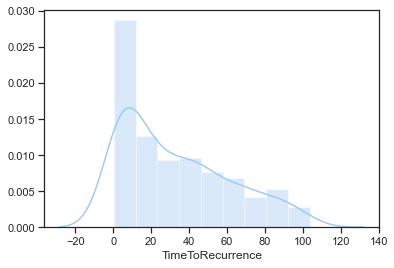

In [24]:
# Sturges for bins number
k = 1 + 3.322 * np.log10(297)


sns.distplot(df["TimeToRecurrence"], bins = int(k))

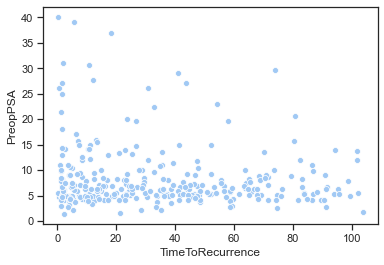

In [25]:
sns.scatterplot(data = df, x = "TimeToRecurrence", y = "PreopPSA")

In [26]:
# Correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
Age,1.000000,-0.033772,-0.117279,0.263286,-0.096458,0.002802,0.039258,-0.139831,-0.077688,-0.042568,-0.066726,0.011047,0.085618,-0.047594,-0.030844,0.040714,-0.040714,0.051947
AA,-0.033772,1.000000,-0.098207,-0.034905,0.036945,-0.078621,-0.025056,0.103248,0.017058,0.116693,0.009907,-0.017884,0.003891,-0.012383,-0.025865,0.102027,-0.102027,-0.061848
FamHx,-0.117279,-0.098207,1.000000,0.003663,-0.014083,0.015049,-0.022954,-0.029019,0.023582,-0.069375,-0.098896,-0.016191,0.089242,0.025830,-0.029503,-0.114978,0.114978,-0.078285
PVol,0.263286,-0.034905,0.003663,1.000000,-0.204055,-0.085199,-0.000412,-0.070811,0.065702,0.228582,-0.133259,0.141524,-0.027258,-0.069511,-0.017686,-0.016634,0.016634,0.071354
TVol,-0.096458,0.036945,-0.014083,-0.204055,1.000000,0.304196,0.304390,0.229156,-0.490415,0.296367,0.117746,-0.138401,0.229402,0.195294,0.073094,0.286492,-0.286492,-0.092092
T Stage,0.002802,-0.078621,0.015049,-0.085199,0.304196,1.000000,0.438453,0.308771,-0.375042,0.267521,0.275819,-0.081559,-0.053454,0.223742,-0.020458,0.226436,-0.226436,-0.151309
bGS,0.039258,-0.025056,-0.022954,-0.000412,0.304390,0.438453,1.000000,0.162692,-0.368225,0.290056,0.344576,-0.053492,0.054220,0.240160,0.125857,0.330658,-0.330658,-0.235780
BN+,-0.139831,0.103248,-0.029019,-0.070811,0.229156,0.308771,0.162692,1.000000,-0.137620,0.246980,0.286943,-0.044659,-0.156481,0.334095,-0.013848,0.142341,-0.142341,-0.048627
OrganConfined,-0.077688,0.017058,0.023582,0.065702,-0.490415,-0.375042,-0.368225,-0.137620,1.000000,-0.220841,-0.161541,0.019908,-0.137720,-0.207416,-0.077646,-0.254215,0.254215,0.088697
PreopPSA,-0.042568,0.116693,-0.069375,0.228582,0.296367,0.267521,0.290056,0.246980,-0.220841,1.000000,0.226027,0.029575,-0.078774,0.156789,0.036179,0.244159,-0.244159,-0.083251


### Does the size of the tumor influence time to recurrence?
The original question "Does the size of the tumor influence time to recurrence?" cannot be answered. We were able to see inconsistency in the data between columns Recurrence and TimeToRecurrence.

In [27]:
# Correlation
df['TimeToRecurrence'].corr(df['TVol'])

# indicates a insignificant correlation.

-0.09209171760568455

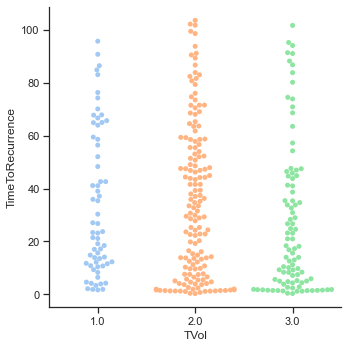

In [28]:
# the distribuition of TVol categories show us higher agglomeration in TVol = 2, indicating that data cleaning is necessary
sns.catplot(x="TVol", y="TimeToRecurrence", kind="swarm", data= df)

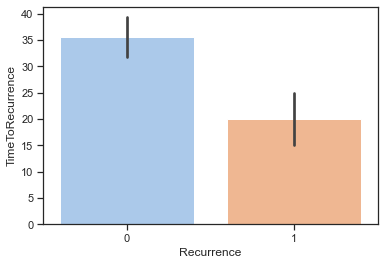

In [29]:
# inconsistency
sns.barplot(data=df, x="Recurrence", y="TimeToRecurrence")

In [30]:
# if count the positive censoring indicator, we will have the same number of non-recurrences
# maybe, all non-recurrences cases are recurrence cases
rec = df['Recurrence'].value_counts()
censor = df['Censor'].value_counts()

print(rec)
print(censor)

0    262
1     54
Name: Recurrence, dtype: int64
1    262
0     54
Name: Censor, dtype: int64


### Is any adjuvant therapy effective so that there is no recurrence?
This question have the same problem as the previous one: inconsistent data.
So, let's look at the time of recurrence.

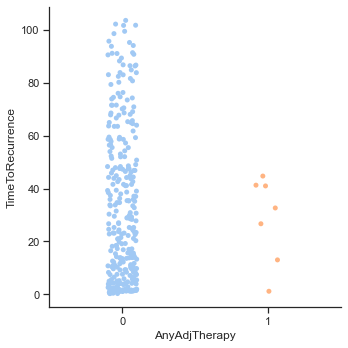

In [31]:
# agglomeration cases in 0 to Any Adjuvant Therapy. 
# This could answer something positive about adjuvant therapies, but we see the need for data cleaning.
sns.catplot(data = df, x = "AnyAdjTherapy", y = "TimeToRecurrence")

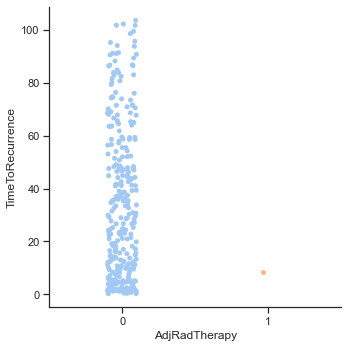

In [105]:
# the same for radiation therapy
sns.catplot(data = df, x = "AdjRadTherapy", y = "TimeToRecurrence")

### Is there a recurrence only in patients who had a high Gleason score?

C:\Users\Elayni\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Elayni\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([189.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0.,  32.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

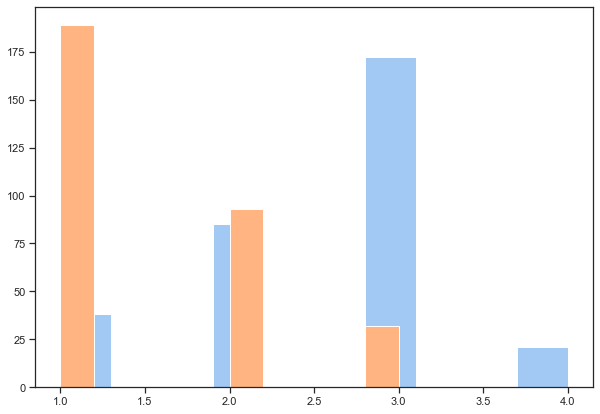

In [32]:

plt.figure(figsize=(10,7))
plt.hist(df["sGS"])
plt.hist(df["bGS"])

In [33]:
df['sGS'].value_counts()

3    172
2     85
1     38
4     21
Name: sGS, dtype: int64

In [34]:
df['bGS'].value_counts()

1.0    189
2.0     93
3.0     32
Name: bGS, dtype: int64

In [ ]:
### Conclusions 
This study shows how important it is to have a clean data before extracting any information.
The dataset is very unbalanced, with many inconsistent data. 
Is necessary a good cleaning, evaluate previous data transformations.
